In [1]:
from sklearn import datasets

In [8]:
#Load dataset - this data is stored in dictionary format
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [13]:
#Description of the data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
#Defining X and y
X=iris['data'][:, (2,3)]
y=iris['target']

In [23]:
#Declaring bias term in X 
import numpy as np
X_with_bias=np.c_[np.ones(len(X)),X]     #np.c_ -> Concatenates the slices

In [26]:
#Spliting the dataset into train-validation-test set
test_ratio=0.2
valid_ratio=0.2
total_size=len(X_with_bias)

test_size=int(total_size*test_ratio)
valid_size=int(total_size*valid_ratio)
train_size=total_size - test_size - valid_size

rnd_indices=np.random.permutation(total_size)                     #To shuffle up the data for even distribution among test, validation and train split

X_train=X_with_bias[rnd_indices[:train_size]]
y_train=y[rnd_indices[:train_size]]
X_valid=X_with_bias[rnd_indices[train_size:-test_size]]
y_valid=y[rnd_indices[train_size:-test_size]]
X_test=X_with_bias[rnd_indices[-test_size:]]
y_test=y[rnd_indices[-test_size:]]

In [27]:
print(y_train)

[2 2 1 2 2 1 2 1 2 0 1 0 1 1 0 0 1 0 2 1 2 2 0 2 0 1 1 2 0 2 0 0 2 0 0 1 2
 1 1 0 1 1 2 1 1 0 0 0 1 0 0 2 1 1 1 1 0 1 1 0 1 0 0 2 0 1 1 2 0 1 0 1 0 1
 0 2 2 2 0 2 1 1 2 0 2 0 2 0 2 2]


In [72]:
#As we see above the target is having values of classes 0,1,2 but we need it to be 1 if the class is accepted else 0
def one_hot(y):
    n_classes=y.max()+1
    #print(n_classes)
    m=len(y)
    Y_one_hot=np.zeros((m,n_classes))
    #print([np.arange(m),y])
    Y_one_hot[np.arange(m), y] = 1               #this will populate [0,2] with 1, [1,2] with 1, [2,1] with 1 and so on
    return Y_one_hot

In [73]:
one_hot(y_train[:10])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [74]:
#Applying one-hot on all the 3 sets
Y_train_one_hot = one_hot(y_train)
Y_valid_one_hot = one_hot(y_valid)
Y_test_one_hot = one_hot(y_test)

In [75]:
#According to softmax formula - exp(s(x))[suffix k]/sum(exp(s(x))[suffix]
def softmax(logits):
    exps=np.exp(logits)
    exp_sums=np.sum(exps, axis=1, keepdims=True)
    return exps/exp_sums

In [76]:
n_inputs=X_train.shape[1]             # 3 -> 2 features + bias_term
n_outputs=len(np.unique(y_train))     # 3 -> (3 iris classes)

In [78]:
#Creating the model
eta=0.01
n_iterations=5001
m=len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iterations):
    logits=X_train.dot(theta)
    Y_prob=softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_prob + epsilon), axis=1))
    error = Y_prob - Y_train_one_hot
    if iter % 500 == 0:
        print (iter, loss)
    gradient = 1/m * X_train.T.dot(error)
    theta = theta - eta * gradient

0 2.5124146553941107
500 0.9745517085183415
1000 0.7708003796789358
1500 0.6530716559180744
2000 0.580346752552203
2500 0.531129096496136
3000 0.4951718322286116
3500 0.4673537765456911
4000 0.4449080990601242
4500 0.42622248693083753
5000 0.4102936838996752


In [79]:
theta

array([[ 3.33801499, -0.17501254, -2.70053181],
       [-0.24655977,  0.7026708 ,  0.75652343],
       [-0.77307927,  0.73306543,  2.14205628]])

In [85]:
logits=X_valid.dot(theta)
Y_prob=softmax(logits)
y_predict= np.argmax(Y_prob, axis=1)
print(y_predict)
print(y_valid)

accuracy_score= np.mean(y_predict==y_valid)
accuracy_score

[2 2 1 2 1 2 0 1 2 0 1 2 1 0 0 0 1 2 2 1 2 2 1 1 2 2 1 2 0 1]
[2 2 1 2 1 2 0 1 2 0 1 2 1 0 0 0 1 2 2 1 2 2 1 1 2 2 1 2 0 1]


1.0

In [87]:
#Adding regularization
eta=0.01
n_iterations=5001
m=len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iterations):
    logits=X_train.dot(theta)
    Y_prob=softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_prob + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))                                   #Ignoring the bias term
    loss = xentropy_loss + alpha * l2_loss
    error = Y_prob - Y_train_one_hot
    if iter % 500 == 0:
        print (iter, loss)
    gradient = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradient                                       #we don't regularize the first element of Theta since this corresponds to the bias term

0 3.645034634179529
500 0.8889875455792703
1000 0.7313210247828742
1500 0.653745210471941
2000 0.6112850774715729
2500 0.5856756375273607
3000 0.5689335102144203
3500 0.557264163799764
4000 0.5487088675124003
4500 0.5421795346165802
5000 0.5370332937859221


In [88]:
logits=X_valid.dot(theta)
Y_prob=softmax(logits)
y_predict= np.argmax(Y_prob, axis=1)
print(y_predict)
print(y_valid)

accuracy_score= np.mean(y_predict==y_valid)
accuracy_score

[2 2 1 2 1 2 0 1 2 0 1 2 1 0 0 0 1 2 2 1 2 2 1 1 2 2 1 2 0 1]
[2 2 1 2 1 2 0 1 2 0 1 2 1 0 0 0 1 2 2 1 2 2 1 1 2 2 1 2 0 1]


1.0

In [89]:
#Adding early stopping condition
eta=0.01
n_iterations=5001
m=len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iterations):
    logits=X_train.dot(theta)
    Y_prob=softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_prob + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))                                   #Ignoring the bias term
    loss = xentropy_loss + alpha * l2_loss
    error = Y_prob - Y_train_one_hot
    if iter % 500 == 0:
        print (iter, loss)
    gradient = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradient                                       #we don't regularize the first element of Theta since this corresponds to the bias term
    
    logits=X_valid.dot(theta)
    Y_prob=softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_prob + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iter % 500 == 0:
        print (iter, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iter-1, best_loss)
        print(iter,loss,'early stopping')
        break

0 2.0818253923139145
0 2.1903477688693416
500 0.8617638679099227
500 0.7995957709927541
1000 0.7420210356637289
1000 0.7196407892561292
1500 0.6742222265394988
1500 0.6741509972570723
2000 0.6327721476574306
2000 0.6459050327231884
2500 0.605569120213689
2500 0.626916538687396
3000 0.5866181944819877
3000 0.6132911850348309
3500 0.5727600365507143
3500 0.6030009670814341
4000 0.5622239538507603
4000 0.5949163027783524
4500 0.5539602072513653
4500 0.5883676032599687
5000 0.5473148181507468
5000 0.5829355970649076


In [91]:
#Test score
logits = X_test.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667

[0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]


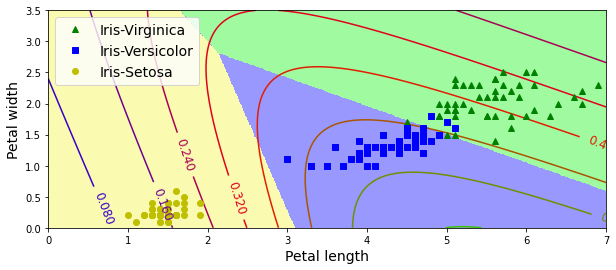

In [97]:
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()